In [1191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss,make_scorer
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC 

In [1192]:
train=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Train.csv')
test=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Test.csv')

In [1193]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [1194]:
train['New1']=train['f8']+train['f9']+train['f15']+train['f17']+train['f19']+train['f27']+train['f22']
test['New1']=test['f8']+test['f9']+test['f15']+test['f17']+test['f19']+test['f27']+test['f22']
train['New2']=train['f2']+train['f22']+train['f14']+train['f18']+train['f0']
test['New2']=test['f2']+test['f22']+test['f14']+test['f18']+test['f0']
train['New3']=train['f7']+train['f24']+train['f1']+train['f4']+train['f21']
test['New3']=test['f7']+test['f24']+test['f2']+test['f4']+test['f21']

In [1195]:
#f8,f9,f15,f17,f19,f27

In [1196]:
train.index

RangeIndex(start=0, stop=620, step=1)

In [1164]:
for i in train.columns:
    print(train[i].value_counts(), test[i].value_counts())

-0.825098    302
 0.511733    182
 2.294174     57
-0.379487     37
 0.066123     17
 1.848564     12
 1.402954      8
 0.957343      5
Name: f0, dtype: int64 -0.837812    130
 0.411859     70
 2.078087     29
-0.421255     14
 1.244973      8
 1.661530      7
 0.828416      5
-0.004698      3
Name: f0, dtype: int64
-0.264250    567
 3.809407     14
 4.550071     12
 3.068742     11
 0.180149      7
 0.328282      3
 0.476415      2
 0.032016      2
 4.920404      1
-0.042051      1
Name: f1, dtype: int64 -0.273636    242
 2.839879      6
 3.531771      5
 4.569609      4
 0.141500      4
 4.223663      3
 0.003121      2
Name: f1, dtype: int64
-0.461423    504
 1.388246     38
 3.032397     22
 1.593765     20
 2.004803     19
 2.415840     12
 2.826878      5
Name: f2, dtype: int64 -0.496119    210
 1.276580     16
 1.473547     14
 2.852313     12
 1.867480      7
 2.261413      7
Name: f2, dtype: int64
 0.409400    531
-2.442599     89
Name: f3, dtype: int64  0.463262    219
-2.158

KeyError: 'grade'

Wall time: 1.85 s


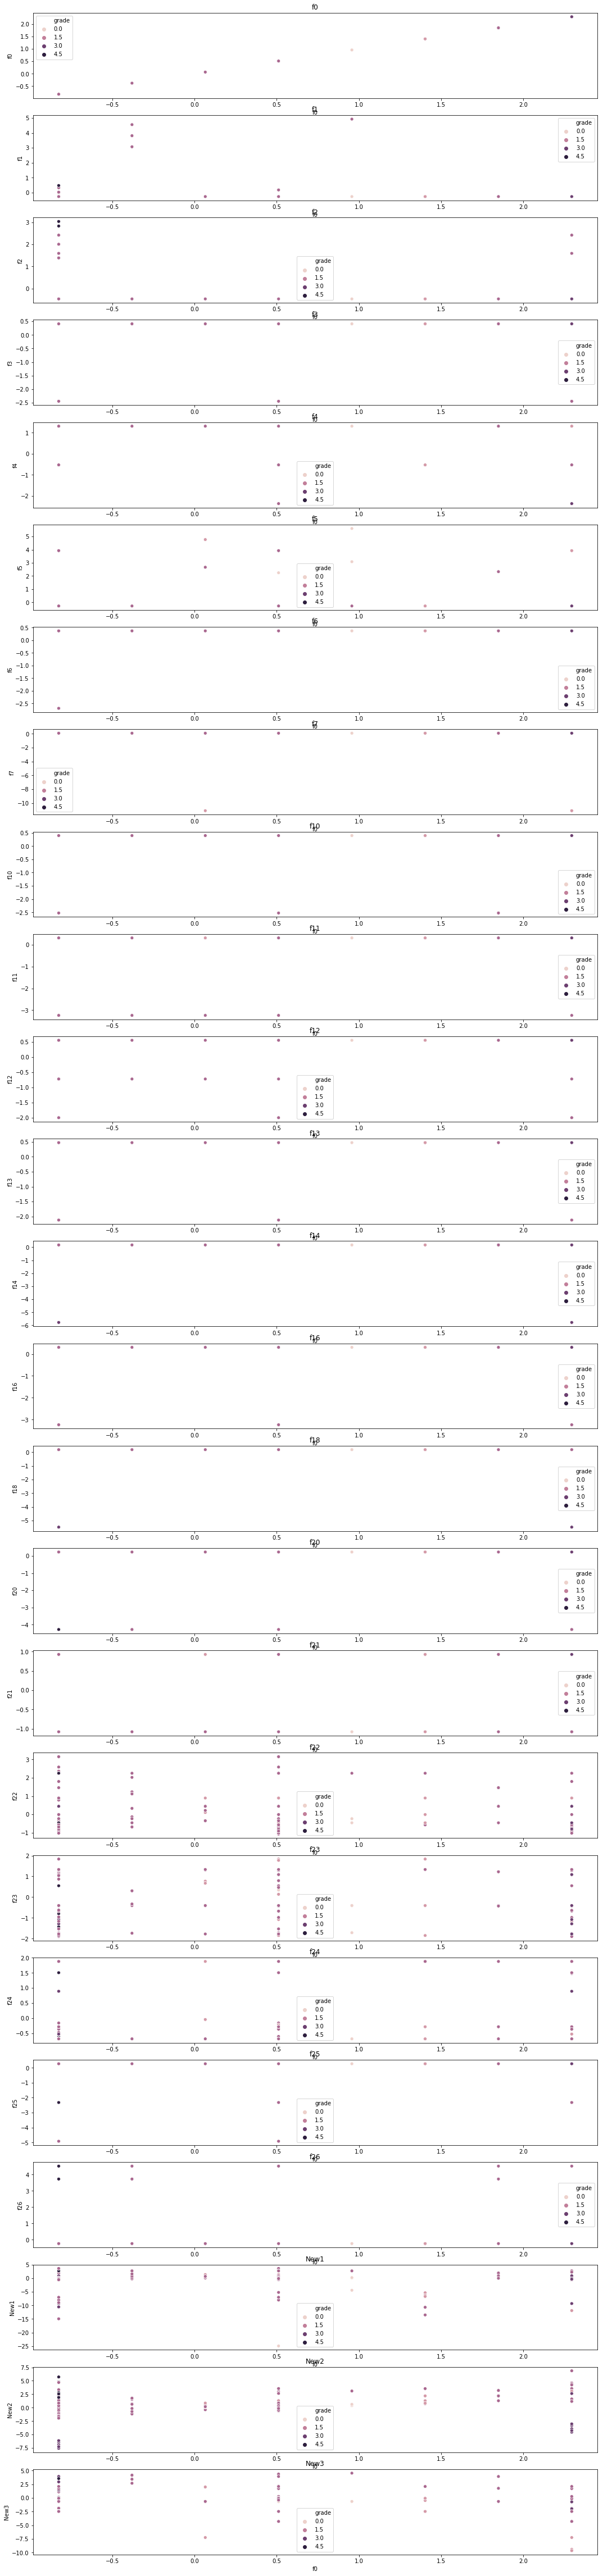

In [1217]:
%%time
p=1
l=620
import seaborn as sns
plt.figure(figsize=(18,100))
for i in train.columns:
    plt.subplot(30,1,p)
    p=p+1
    plt.title(i)
    #plt.scatter(range(l),train['f0'][:l],alpha=0.3)
    #plt.scatter(range(l),train[i][:l],alpha=1)
    sns.scatterplot(train['f0'], train[i], hue = label)

In [1172]:
## f17, f15, f9,f16

In [1197]:
label.value_counts()

2.0    472
1.0     68
3.0     47
4.0     27
0.0      6
Name: grade, dtype: int64

In [1198]:
label=train.grade
train.drop(columns=['f8','f9','f15','f17','f19','f27','grade'],inplace=True)
test.drop(columns=['f8','f9','f15','f17','f19','f27'],inplace=True)

In [1199]:
label = label.astype('float')

In [1200]:
def loss(y_pred,y_true, eps = 1e-30):
    y_pred = np.clip(y_pred,eps,1-eps)
    return (-(y_true * np.log(y_pred)).sum(axis=1).mean())

In [1201]:
l=list()
l=[DecisionTreeClassifier(random_state=50),RandomForestClassifier(random_state=50),SVC(probability=True),AdaBoostClassifier(random_state=50),GradientBoostingClassifier(random_state=50),ExtraTreesClassifier(random_state=9)]

In [1202]:
%%time
w=0
final=list()
import warnings
warnings.filterwarnings(action='ignore')

def splitting(m, train= train, label = label, test = test, random_state = 9):
    a = list()
    sss=StratifiedShuffleSplit(random_state= random_state,test_size=0.2,n_splits=3)
    for tr_index, te_index in sss.split(train,label):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict_proba(xtest)
        a.append(loss(p,pd.get_dummies(ytest).values))
    pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()
    print(np.mean(a))
    return(pd.DataFrame(m.predict_proba(test)))

Wall time: 0 ns


In [ ]:
splitting(SVC(C=7,probability=True),random_state=220).head()

In [1142]:
splitting(LogisticRegression(multi_class="multinomial",solver='lbfgs',C=10),random_state=150).head()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

0.14465047180510227


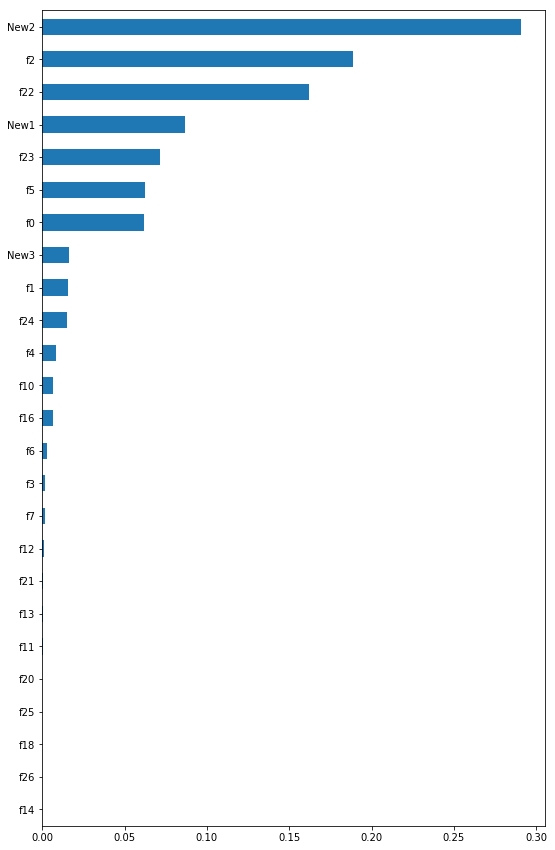

In [1203]:
plt.figure(figsize=(9,15))
a=splitting(GradientBoostingClassifier(),random_state=500)

0.10204995654882758


,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.3,0.7,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


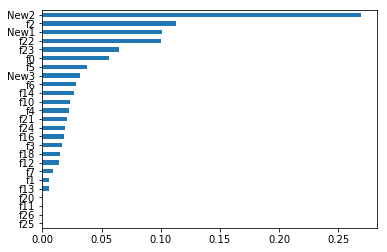

In [1207]:
splitting(RandomForestClassifier(), random_state=250).head()

In [ ]:
#'f9','f25','f11','f20','f26','f27','f3','f12','f13'

In [ ]:
a.to_excel('SSubmit.xlsx',index=False)

In [ ]:
final=pd.DataFrame(m.predict_proba(test))

In [ ]:
f.to_excel('sdubmit.xlsx',index=False)

In [ ]:
f = final[1]